In [43]:
import matplotlib.pyplot as plt 
import numpy as np

import cv2


%matplotlib inline



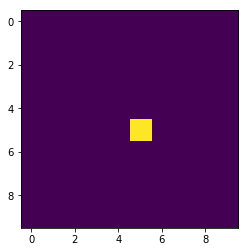

In [44]:


a = np.zeros((10,10))


a[5,5] = 1

plt.imshow(a)



In [45]:
ubar = (4.-a.shape[1]/2)/a.shape[1]
vbar = (5.-a.shape[0]/2)/a.shape[0]
print(ubar,vbar)
fl = 0.002
dist = 1.

vz = 0.0
wy = 0.5


(-0.1, 0.0)


In [46]:
def calc(vz,wy, ubar, vbar, fl, z):
    return ubar/z * vz + -(fl**2 + vbar**2)/fl * wy,             vbar/z * vz - ubar*vbar/fl * wy

ubardot, vbardot = calc(vz,wy, ubar, vbar, fl, dist)

print(ubardot,vbardot)

(-0.001, 0.0)


In [47]:
for u,v in zip(range(10),range(10)):
    ubar = (float(u)-a.shape[1]/2)/a.shape[1]
    vbar = (float(v)-a.shape[0]/2)/a.shape[0]
    print(ubar,vbar)
    print(calc(vz,wy,ubar,vbar,fl,dist))

(-0.5, -0.5)
(-62.501, -62.5)
(-0.4, -0.4)
(-40.001000000000005, -40.00000000000001)
(-0.3, -0.3)
(-22.501, -22.5)
(-0.2, -0.2)
(-10.001000000000001, -10.000000000000002)
(-0.1, -0.1)
(-2.501000000000001, -2.5000000000000004)
(0.0, 0.0)
(-0.001, 0.0)
(0.1, 0.1)
(-2.501000000000001, -2.5000000000000004)
(0.2, 0.2)
(-10.001000000000001, -10.000000000000002)
(0.3, 0.3)
(-22.501, -22.5)
(0.4, 0.4)
(-40.001000000000005, -40.00000000000001)


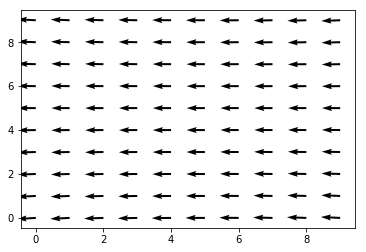

In [70]:
import itertools

x = []
y = []
result1 = np.zeros((10,10))
result2 = np.zeros((10,10))
result11=[]
result22=[]

fl = 2
dist = 1

vz = 0
wy = .1

for v,u in itertools.product(range(10), range(10)):
    ubar = (float(u)-a.shape[1]/2)/a.shape[1]
    vbar = (float(v)-a.shape[0]/2)/a.shape[0]
    ubardot,vbardot = calc(vz,wy,ubar,vbar,fl,dist)

    result1[v,u] = ubardot
    result2[v,u] = vbardot
    x.append(u)
    y.append(v)
    result11.append(ubardot)
    result22.append(vbardot)

plt.quiver(x,y,result1, result2)
#plt.quiver(0,0, 1, 1)

In [7]:
def deform_image(image, ubardot, vbardot):


    deformed = cv2.remap(image, ubardot.astype(np.float32), vbardot.astype(np.float32), cv2.INTER_LINEAR)

    return deformed

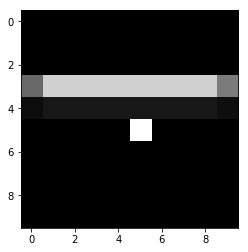

In [8]:
b =  np.zeros((10,10))
b[3, :] = 1
image = a + b
mapx_base, mapy_base = np.meshgrid(np.arange(image.shape[0]), np.arange(image.shape[1]))

mapx = mapx_base + result1 * 1
mapy = mapy_base + result2 * 1


plt.imshow(deform_image(image, mapx, mapy), cmap='gray')

#print('{}, {}'.format(mapx, mapy))


In [97]:
import itertools

def distorcao(image, vz=1, wy=0.):

    x = []
    y = []
    image = np.array(image)
    #result1 = np.zeros((image.height,image.width))
    #result2 = np.zeros((image.height,image.width))
    result1 = np.zeros(image[:,:,0].shape)
    result2 = np.zeros(image[:,:,0].shape)
    result11=[]
    result22=[]

    fl = 1
    dist = 0.1


    #for v,u in itertools.product(range(image.height), range(image.width)):
    for v,u in itertools.product(range(image.shape[0]), range(image.shape[1])):
        #ubar = (float(u)-image.width/2)/image.height
        #vbar = (float(v)-image.height/2)/image.width
        ubar = (float(u)-image.shape[1]/2)/image.shape[0]
        vbar = (float(v)-image.shape[0]/2)/image.shape[1]
        ubardot,vbardot = calc(vz,wy,ubar,vbar,fl,dist)

        result1[v,u] = ubardot
        result2[v,u] = vbardot
        x.append(u)
        y.append(v)
        result11.append(ubardot)
        result22.append(vbardot)


    #mapx_base, mapy_base = np.meshgrid(np.arange(image.width), np.arange(image.height))
    mapx_base, mapy_base = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))

    mapx = mapx_base + result1 * -1
    mapy = mapy_base + result2 * -1

    return deform_image(np.array(image),mapx,mapy)

    



#plt.quiver(x,y,result11, result22)
#plt.quiver(0,0, 1, 1)





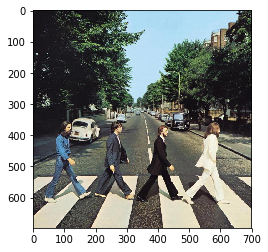

In [98]:
from PIL import Image

image = Image.open('../pedestrian/abey-road.jpg')
#/home/felipevein/Desktop/catkin_ws/src/soybot_control/scripts/pedestrian/abey-road.jpg

plt.imshow(image)

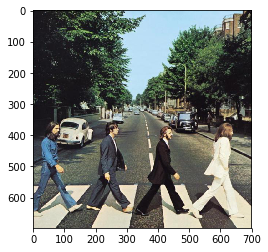

In [99]:
plt.imshow(distorcao(image, vz = 10, wy = 0))

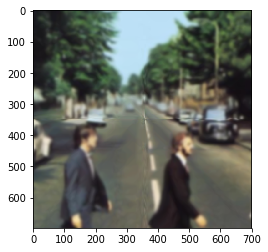

In [100]:
from copy import deepcopy
image2 = deepcopy(image)



for i in range(50):
    image2 = distorcao(image2, vz = 1, wy = 0.1)


plt.imshow(distorcao(image2, vz = 1, wy = 0.1))